Classical Harmonic Oscillator
====

Many problems in physics come down to this simple relation:
$$
\ddot{x} = -\omega^2 x
$$

where $x$ can be any quantity and $\omega$ can be any combination of relevant constants. The resultant motion is known as "simple harmonic motion", i.e.

$$ x(t) = A \cos(\omega t + \phi) $$

Where $A$ is the amplitude of the motion, $\omega$ is the collection of various constants from before, and $\phi$ is a phase that is set by the initial conditions of the problem.

It is traditional to consider a spring-mass system where a spring with rest length $x_0$ and spring constant $k$ is attached to a mass $m$. If we write down our expression for $\ddot{x}$ using Newton's second law we find
$$
m \ddot{x} = -k x
$$
which reduces to
$$
\ddot{x} = -\omega^2 x
$$
where 
$$
\omega = \sqrt{\frac{k}{m}}
$$
We can see that the oscillation frequency of the spring mass system is determined by the stiffness, $k$, of the spring and mass, $m$, we have attached to it.

The Analytical Solution
----------------------
Given a spring-mass system with mass $m$ and spring constant $k$ we can derive the motion of the system analytically and compare our results from a numerical simulation. 

We know the solution has form
$$
    x(t) = A \cos(\omega t + \phi)\\
    v(t) = -A \omega \sin(\omega t + \phi)
$$
so we can apply our initial conditions
$$
    x(0) = x_0 = A \cos(\phi) \\
    v(0) = v_0 = -A \omega \sin(\phi)
$$
Dividing one equation by another we get
$$
    \tan(\phi) = \frac{ -v_0 }{ \omega x_0 }
$$
or
$$
    \phi = \tan^{-1}\left( \frac{-v_0}{\omega x_0} \right)
$$
and we can plug this result back into our initial condition for position and find that
$$
    A = \sqrt{ x_0^2 + \left(\frac{v_0}{\omega}\right)^2}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def undamped_oscillator_euler(x0,v0,k,m,tmax,dt):
    """
        Numerically integrate the equation of motion for an undamped harmonic oscillator
        using a simple euler method.
    """
    
    # calculate the number of time steps
    num_time_steps = np.floor(tmax/dt)
    time = np.linspace(0, tmax, num_time_steps)
    
    # define arrays for position and velocity
    x = np.zeros(num_time_steps)
    v = np.zeros(num_time_steps)
    
    # apply initial conditions
    x[0] = x0
    v[0] = v0
    
    #define constants
    omega = np.sqrt(k/m)
    
    # use F = ma and the euler method to integrate the equation of motion
    for i in range(1,len(time)):
        a = -k/m * x[i-1]
        x[i] = v[i-1]*dt + 0.5 * a * dt**2 + x[i-1]
        v[i] = a * dt + v[i-1]
    
    return (x,v,time)

def undamped_oscillator_exact_pos(A,omega,phi,t):
    return A*np.cos(omega*t + phi)

def undamped_oscillator_exact_vel(A,omega,phi,t):
    return -A*omega*np.sin(omega*t+phi)

In [10]:
# initial conditions for the simulation
x0 = 1
v0 = 0
k = 10
m = 1
tmax = 10
dt = 0.001

# results we derived from our analytical analysis above
omega = np.sqrt(k/m)
phi = np.arctan(-v0 / (omega*x0))
A = np.sqrt(x0**2+v0**2/omega**2)

# generate numerical trajectory given initial conditions
x,v,t = undamped_oscillator_euler(x0,v0,k,m,tmax,dt)

/Users/josephwhalen/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephwhalen/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


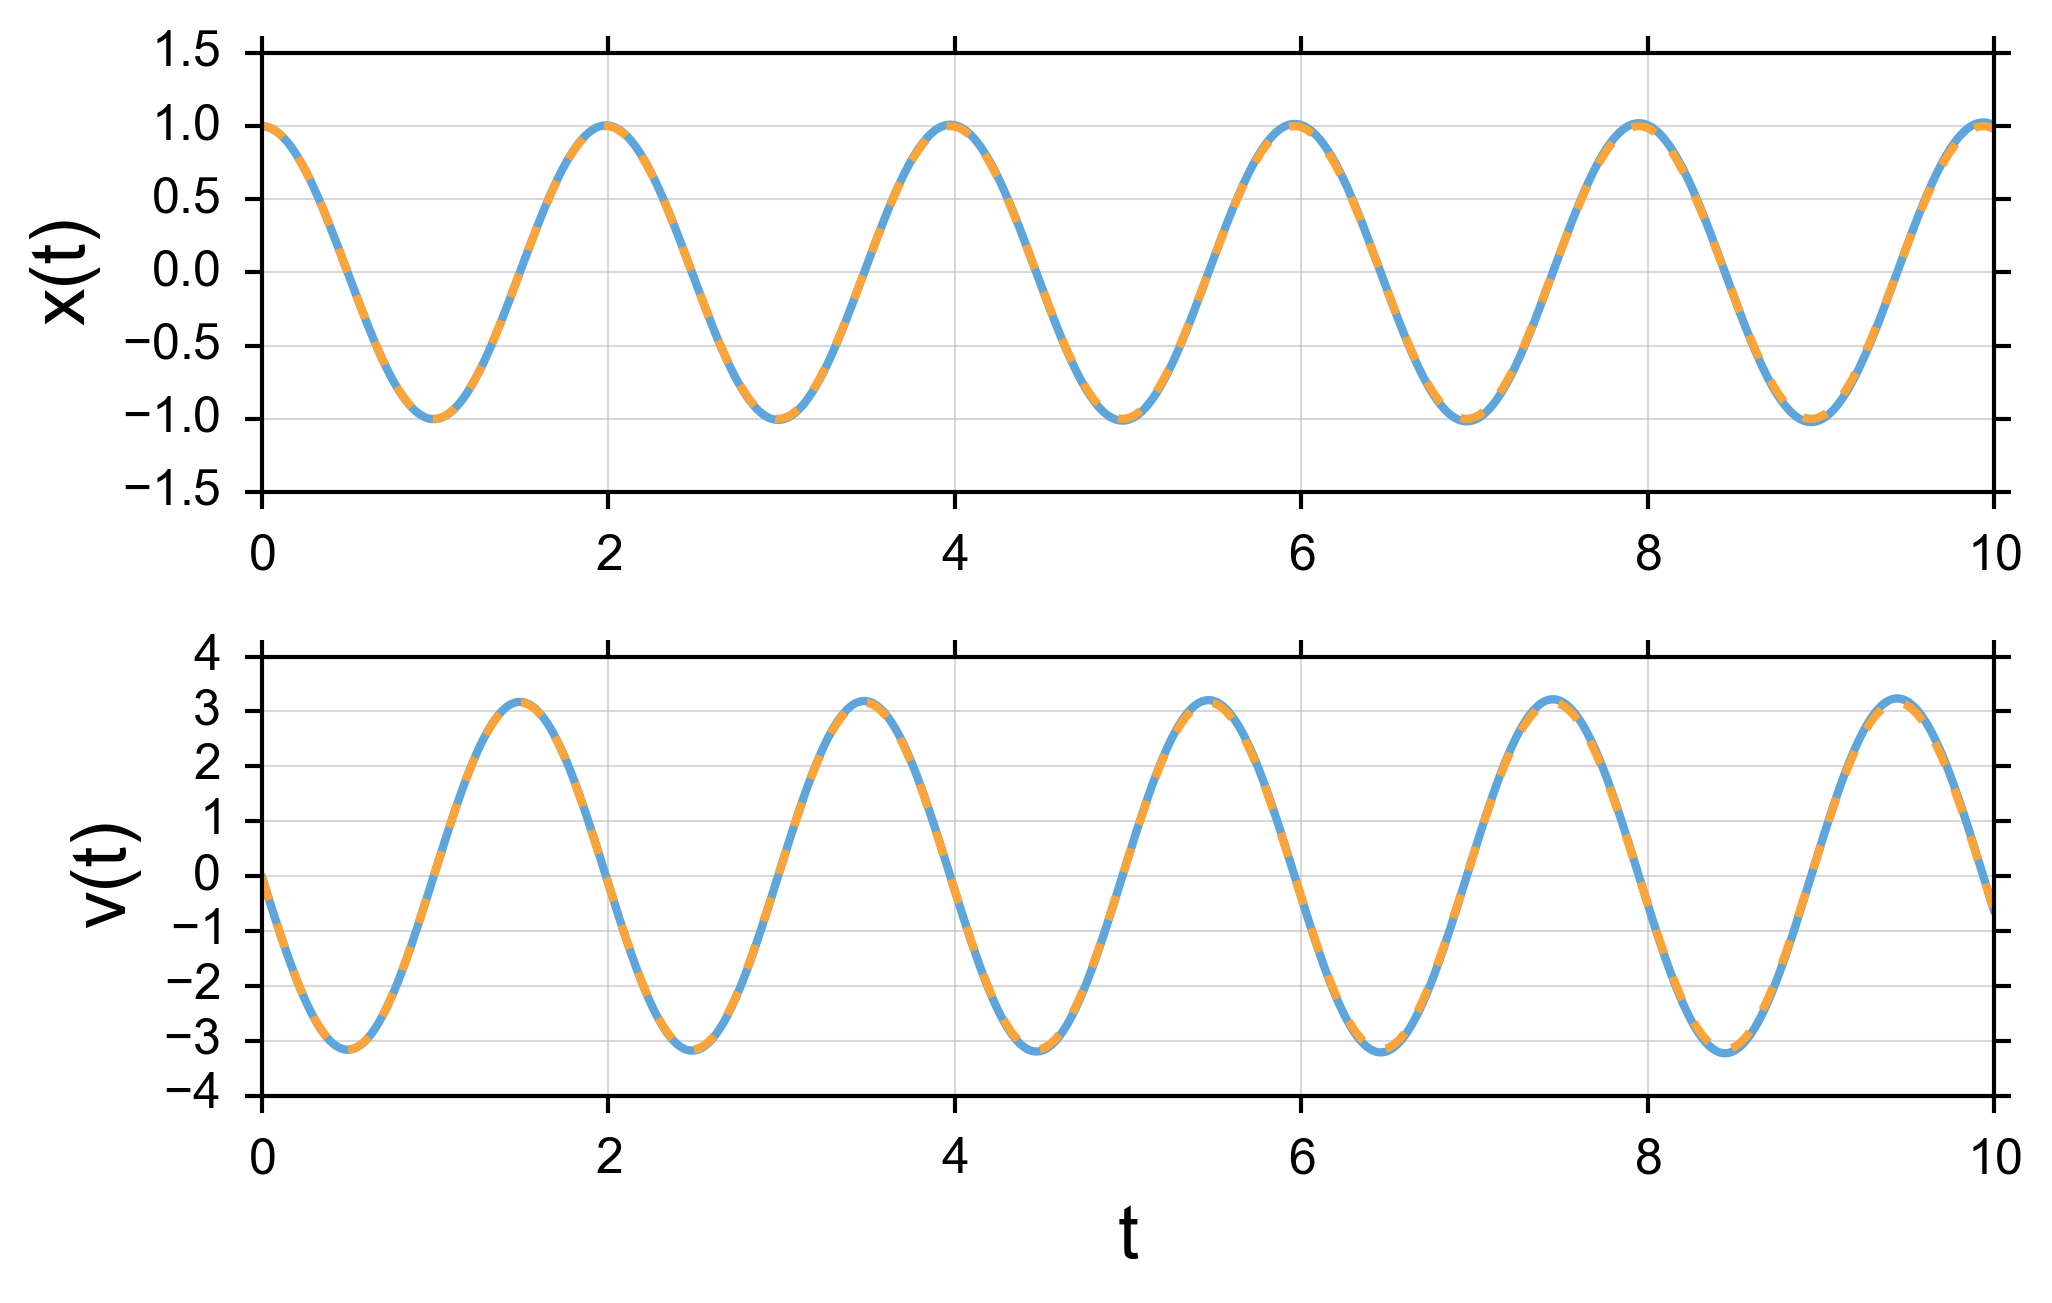

In [11]:
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(t,x)
ax1.plot(t,undamped_oscillator_exact_pos(A,omega,phi,t),linestyle='--')
ax1.set_ylabel('x(t)')
ax2.plot(t,v)
ax2.set_ylabel('v(t)')
ax2.set_xlabel('t')
ax2.plot(t,undamped_oscillator_exact_vel(A,omega,phi,t),linestyle='--')

plt.tight_layout()


We notice that after a few oscillations our numerical solution does not agree so well with our analytical result. We can quantify this by looking at the deviation in the energy as a function of time.

The kinetic energy of the system is 
$$ T = \frac{1}{2} m \dot{x}^2 $$
and the potential energy is
$$ V = \frac{1}{2} k x^2 $$

There is no external work being done on the spring-mass system, so the total energy of the system is conserved, i.e.
$$
E_{tot} =  T + V = \mathrm{const}
$$

In [12]:
def oscillator_energy(x,v,k,m):
    return 0.5*m*v**2 + 0.5*k*x**2

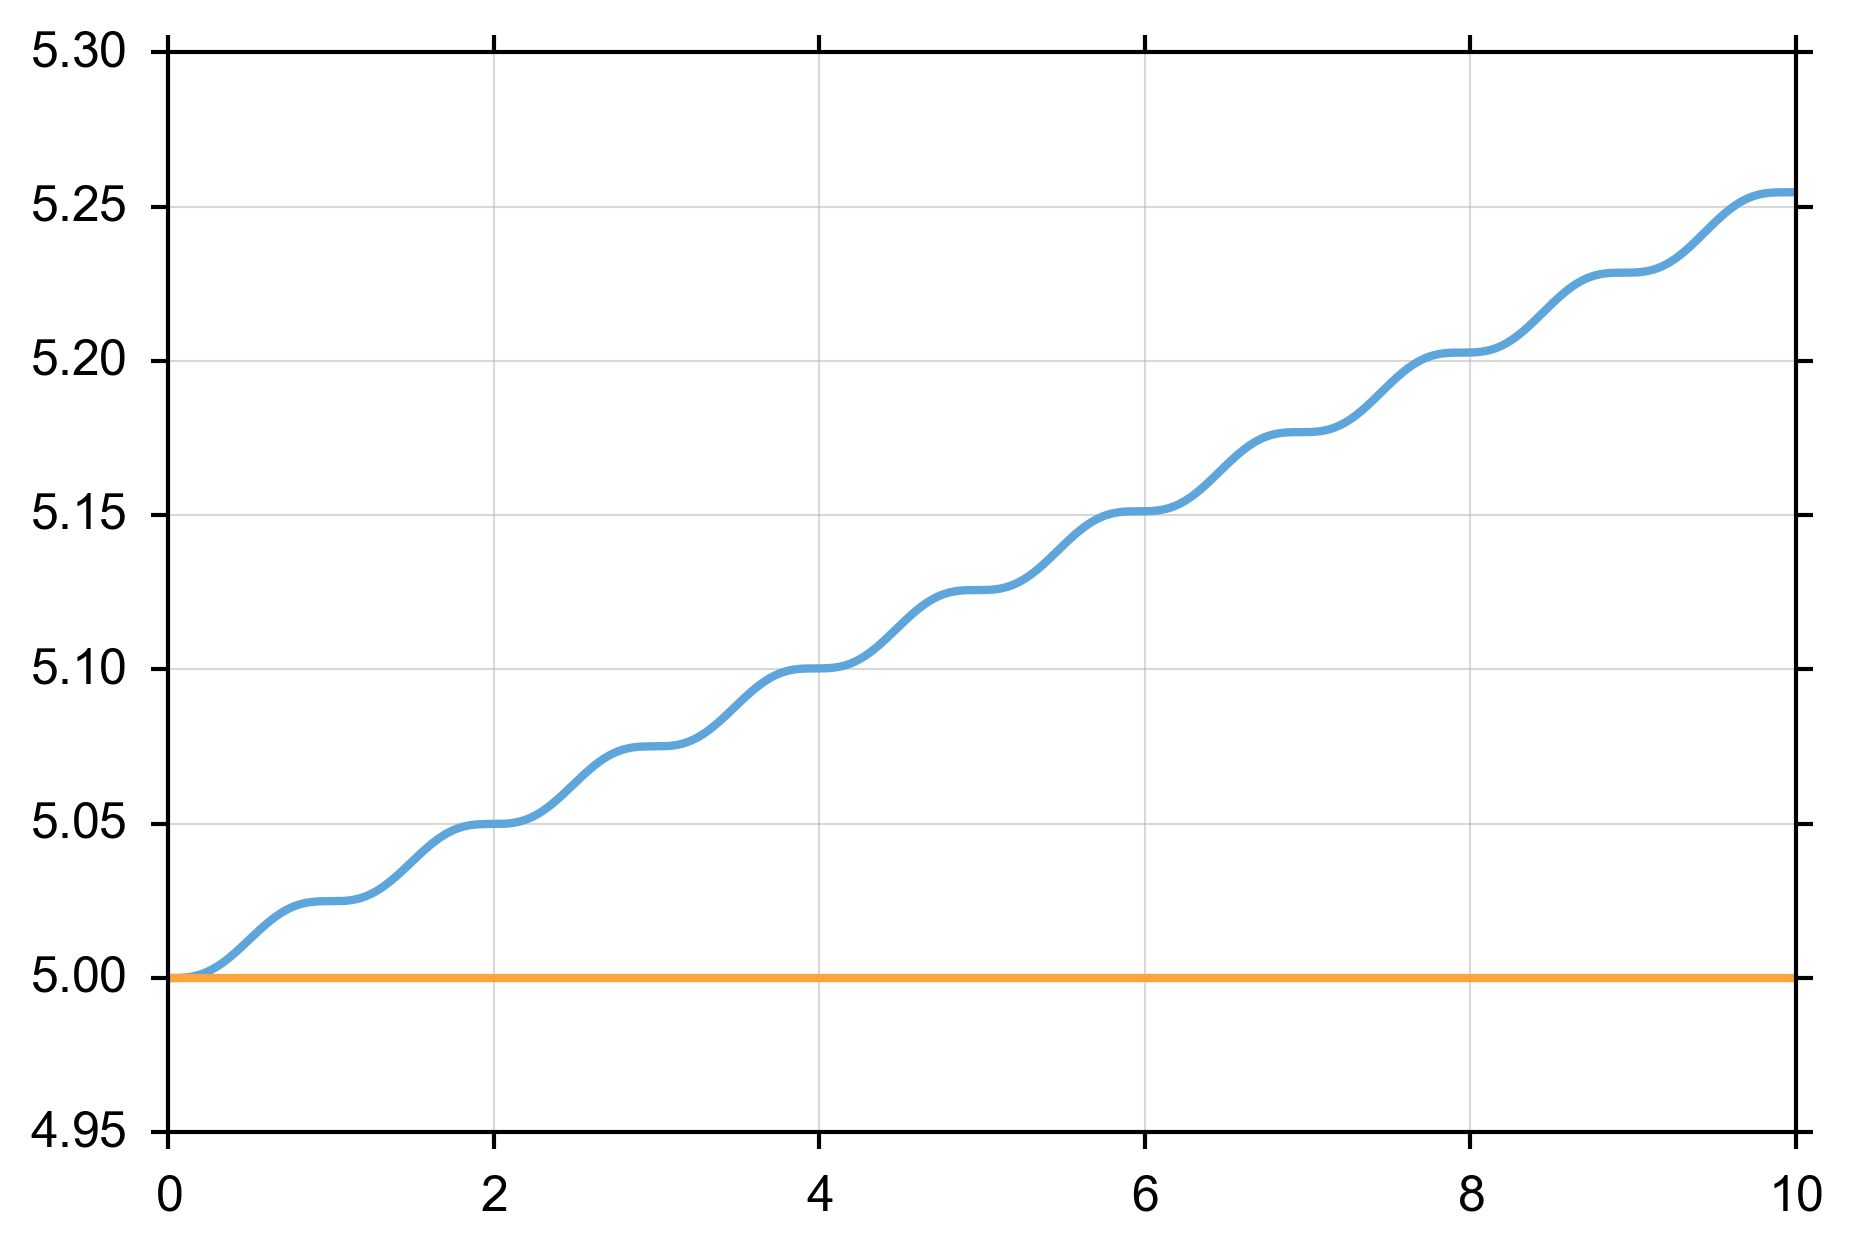

In [13]:
ax = plt.subplot(111)
ax.plot(t, oscillator_energy(x,v,k,m))
ax.plot(t, oscillator_energy( 
        undamped_oscillator_exact_pos(A,omega,phi,t),
        undamped_oscillator_exact_vel(A,omega,phi,t),
        k, m
    ))